<a href="https://colab.research.google.com/github/rajagopalmotivate/nano/blob/master/REPRODUCEABLE_SEM_GOOD2_vgg_Visualizing_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip install q keras==2.2.4

Paper https://www.nature.com/articles/sdata2018172

idea 1: auto ml version of sem 

idea 2 : ensemble of inception, vgg, resnet based approach 

idea 3: denoising AE 

idea 4: inpainting to uncover hidden things 



In [6]:
#delete the directory named mynewfiles including its subfolders with the rm -r command 
!rm -r mynewfiles

rm: cannot remove 'mynewfiles': No such file or directory


In [0]:
!mkdir mynewfiles

In [8]:
# source URL for dataset: https://b2share.eudat.eu/records/72758204db9044ab8b3e6b6c4d2eb576

#!wget https://b2share.eudat.eu/api/files/87275d32-0908-45bc-89e2-8f3d86029283/Nanowires.tar -O /tmp/dir1.tar

!wget https://b2share.eudat.eu/api/files/87275d32-0908-45bc-89e2-8f3d86029283/Fibres.tar -O /tmp/dir1.tar

--2019-09-12 13:06:35--  https://b2share.eudat.eu/api/files/87275d32-0908-45bc-89e2-8f3d86029283/Fibres.tar
Resolving b2share.eudat.eu (b2share.eudat.eu)... 86.50.166.74
Connecting to b2share.eudat.eu (b2share.eudat.eu)|86.50.166.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86446080 (82M) [application/octet-stream]
Saving to: ‘/tmp/dir1.tar’

/tmp/dir1.tar       100%[===================>]  82.44M  10.3MB/s    in 10s     

2019-09-12 13:06:47 (8.26 MB/s) - ‘/tmp/dir1.tar’ saved [86446080/86446080]



In [9]:
!ls /tmp


dir1.tar


In [0]:
!ls mynewfiles

In [0]:
!tar xf  /tmp/dir1.tar -C mynewfiles

In [12]:
!ls mynewfiles

Fibres


In [13]:
#count no of files in a directory folder
!ls mynewfiles/Fibres -1 | wc -l


162


In [14]:
!pwd

/content


In [15]:
!wget https://b2share.eudat.eu/api/files/87275d32-0908-45bc-89e2-8f3d86029283/Biological.tar -O /tmp/dir2.tar
  
#!wget https://b2share.eudat.eu/api/files/87275d32-0908-45bc-89e2-8f3d86029283/Patterned_surface.tar -O /tmp/dir2.tar

--2019-09-12 13:07:08--  https://b2share.eudat.eu/api/files/87275d32-0908-45bc-89e2-8f3d86029283/Biological.tar
Resolving b2share.eudat.eu (b2share.eudat.eu)... 86.50.166.74
Connecting to b2share.eudat.eu (b2share.eudat.eu)|86.50.166.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 709304320 (676M) [application/octet-stream]
Saving to: ‘/tmp/dir2.tar’

/tmp/dir2.tar       100%[===================>] 676.45M  10.3MB/s    in 68s     

2019-09-12 13:08:18 (9.88 MB/s) - ‘/tmp/dir2.tar’ saved [709304320/709304320]



In [16]:
!ls /tmp


dir1.tar  dir2.tar


In [0]:
!tar xf  /tmp/dir2.tar -C mynewfiles

In [18]:
!ls mynewfiles

Biological  Fibres


In [19]:
#count no of files in a directory folder
!ls mynewfiles/Biological   -1 | wc -l

972


In [0]:
# Delete a random set of files so that we can experiement fast. delete all files in this folder except keep 150 files
# Good idea to play with 100 files. Once we are confident, we can run the same experiment to 1000 files as it save waiting time for us
!find mynewfiles/Biological -type f -print0 | sort -zR | tail -zn +150 | xargs -0 rm


In [21]:
#count no of files in a directory folder
!ls mynewfiles/Biological   -1 | wc -l

149


In [0]:
#!wget https://b2share.eudat.eu/api/files/87275d32-0908-45bc-89e2-8f3d86029283/Tips.tar -O /tmp/dir3.tar

In [0]:
#!tar xvf  /tmp/dir3.tar -C mynewfiles

In [0]:
#!ls mynewfiles

#Goal: Just understand the high level concept 
###( let's understand the big picture , don't worry about the coding details right now..)

In [25]:
!ls mynewfiles

Biological  Fibres


In [26]:
!pwd

/content


In [27]:
!ls

mynewfiles  sample_data


In [28]:
import os



rock_dir = os.path.join('mynewfiles/Biological')
paper_dir = os.path.join('mynewfiles/Fibres')
scissors_dir = os.path.join('mynewfiles/Fibres')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 149
total training paper images: 162
total training scissors images: 162
['L7_2b715c0cfa41be6e714d5ed2d6a2568c.jpg', 'L7_f1664a67de3cf75961ea8249034d8722.jpg', 'L7_76caf4340d9eff2f5c58971949481497.jpg', 'L7_ec375264211425f13c6445f228bee7fe.jpg', 'L7_7384eee9d6f1a9afd26ea4633d6c8e4f.jpg', 'L7_b3a6b3ab5b9c7d89fae662533c0c403d.jpg', 'L7_c424a33d5a6adb1af67192a28488c859.jpg', 'L7_054a5781a10df46bdc56046f25d95409.jpg', 'L7_07832b09ff9d4fcfb56698ee5449fa3b.jpg', 'L7_a232b20ddc487b3fbb096149481b4642.jpg']
['L9_48cd792c544d71915f4dbef758f48196.jpg', 'L9_1371472581d1ca66e006212bb1962dad.jpg', 'L9_cf7ee0985731a88fa47e97e965f7347c.jpg', 'L9_72b3bd17c262ddaa06d8e765b01bbc79.jpg', 'L9_6ce8143217fc3597fab9ed95ad1493d5.jpg', 'L9_1363dda6692fce886bf58de8556d9cfa.jpg', 'L9_da4f677c324c57fc3bf7cdc987633d91.jpg', 'L9_a5d3baf495c7a5db065d3b7b541932c1.jpg', 'L9_34cf6e34ac31698d4518935c037fe92f.jpg', 'L9_00fc0a86bd4f02995acdd5b3f63401b9.jpg']
['L9_48cd792c544d71915f4dbef758f48196

mynewfiles/Biological/L7_2b715c0cfa41be6e714d5ed2d6a2568c.jpg
(768, 1024, 3)


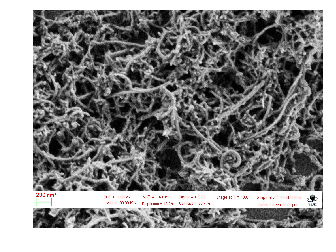

mynewfiles/Biological/L7_f1664a67de3cf75961ea8249034d8722.jpg
(768, 1024, 3)


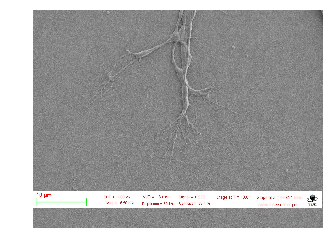

mynewfiles/Fibres/L9_48cd792c544d71915f4dbef758f48196.jpg
(768, 1024, 3)


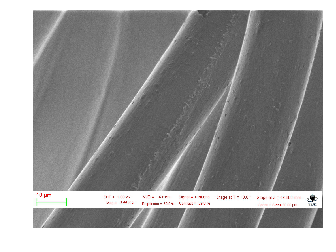

mynewfiles/Fibres/L9_1371472581d1ca66e006212bb1962dad.jpg
(768, 1024, 3)


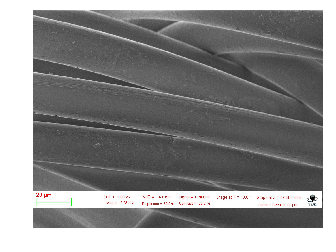

In [29]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]

next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

#for i, img_path in enumerate(next_rock+next_paper+next_scissors):
for i, img_path in enumerate(next_rock+next_paper):
  #print(img_path)
  img = mpimg.imread(img_path)
  print(img_path)
  print(img.shape)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [0]:
SIZE = 150

In [31]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "mynewfiles/"

datagen = ImageDataGenerator(validation_split=0.1, rescale=1./255,      rotation_range=40,
     width_shift_range=0.2,
     height_shift_range=0.2,
     shear_range=0.2,
     zoom_range=0.2,
     horizontal_flip=True,                                                                
     fill_mode='nearest')

train_generator = datagen.flow_from_directory(
    TRAINING_DIR, 
    subset='training',
    target_size=(SIZE,SIZE),
         shuffle=True,     batch_size=10,
	  class_mode='categorical'
)

validation_generator = datagen.flow_from_directory(
    TRAINING_DIR,
    subset='validation',
    	target_size=(SIZE,SIZE),
         shuffle=True,     batch_size=10,
	class_mode='categorical'
)




test_datagen = ImageDataGenerator( rescale=1./255)


test_generator = test_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(SIZE,SIZE),
    batch_size=10,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

Found 281 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
Found 311 images belonging to 2 classes.


In [32]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2019-09-12 13:08:57--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.128, 2404:6800:4008:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  25.4MB/s    in 3.3s    

2019-09-12 13:09:01 (25.4 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [33]:
from keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = InceptionV3(
    input_shape=(SIZE, SIZE, 3), include_top=False, weights=None)
pre_trained_model.load_weights(local_weights_file)

Using TensorFlow backend.


In [34]:
from keras.applications import VGG16

pre_trained_model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(SIZE, SIZE, 3))



58892288/58889256 [==============================] - 6s 0us/step


In [0]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [36]:
#last_layer = pre_trained_model.get_layer('mixed7')

last_layer = pre_trained_model.get_layer('block5_conv1')
print(last_layer.output_shape)
last_output = last_layer.output

(None, 9, 9, 512)


In [0]:
ispostmixed = False 

for layer in pre_trained_model.layers:
  if layer.name == "mixed6":
    ispostmixed = True
  if ispostmixed == True:
    layer.trainable = True
    print(layer.name)

In [38]:
ispostmixed = False 

for layer in pre_trained_model.layers:
  if layer.name == "block4_conv1":
    ispostmixed = True
  if ispostmixed == True:
    layer.trainable = True
    print(layer.name)

block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


In [39]:
from keras import layers

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
x = layers.BatchNormalization() (x)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(5000, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
x = layers.BatchNormalization() (x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.BatchNormalization() (x)
x = layers.Dense(2, activation='softmax')(x)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
from keras import Model
#model = Model(pre_trained_model.input, x)





In [41]:
pre_trained_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [42]:
last_layer = pre_trained_model.get_layer('block5_pool')
print(last_layer.output_shape)
last_output = last_layer.output

(None, 4, 4, 512)


In [0]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
x = layers.BatchNormalization() (x)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(5000, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
x = layers.BatchNormalization() (x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.BatchNormalization() (x)
x = layers.Dense(2, activation='softmax')(x)

In [0]:
from keras import Model
model = Model(pre_trained_model.input, x)

In [45]:
model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0   

In [46]:
count = 1
for alayer in model.layers:
  print( str(count) + '    \t \t \t ' + str(alayer.name) + '    \t \t \t ' +  str(alayer.trainable) )
  count = count + 1 

1    	 	 	 input_2    	 	 	 False
2    	 	 	 block1_conv1    	 	 	 False
3    	 	 	 block1_conv2    	 	 	 False
4    	 	 	 block1_pool    	 	 	 False
5    	 	 	 block2_conv1    	 	 	 False
6    	 	 	 block2_conv2    	 	 	 False
7    	 	 	 block2_pool    	 	 	 False
8    	 	 	 block3_conv1    	 	 	 False
9    	 	 	 block3_conv2    	 	 	 False
10    	 	 	 block3_conv3    	 	 	 False
11    	 	 	 block3_pool    	 	 	 False
12    	 	 	 block4_conv1    	 	 	 True
13    	 	 	 block4_conv2    	 	 	 True
14    	 	 	 block4_conv3    	 	 	 True
15    	 	 	 block4_pool    	 	 	 True
16    	 	 	 block5_conv1    	 	 	 True
17    	 	 	 block5_conv2    	 	 	 True
18    	 	 	 block5_conv3    	 	 	 True
19    	 	 	 block5_pool    	 	 	 True
20    	 	 	 flatten_2    	 	 	 True
21    	 	 	 batch_normalization_98    	 	 	 True
22    	 	 	 dense_4    	 	 	 True
23    	 	 	 dropout_3    	 	 	 True
24    	 	 	 batch_normalization_99    	 	 	 True
25    	 	 	 dense_5    	 	 	 True
26    	 	 	 dropout_4    	 	 

In [47]:
history = model.fit_generator(train_generator, epochs=6, validation_data = validation_generator , verbose = 1, steps_per_epoch=1, validation_steps=1)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/6
1/1 [==============================] - 9s 9s/step - loss: 1.4544 - acc: 0.4000 - val_loss: 11.2827 - val_acc: 0.3000
Epoch 2/6
1/1 [==============================] - 0s 258ms/step - loss: 1.9084 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/6
1/1 [==============================] - 0s 247ms/step - loss: 1.2603 - acc: 0.7000 - val_loss: 9.6709 - val_acc: 0.4000
Epoch 4/6
1/1 [==============================] - 0s 440ms/step - loss: 0.4497 - acc: 0.9000 - val_loss: 3.2236 - val_acc: 0.8000
Epoch 5/6
1/1 [==============================] - 0s 406ms/step - loss: 4.1824 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 6/6
1/1 [==============================] - 0s 448ms/step - loss: 0.9286 - acc: 0.7000 - val_loss: 4.8354 - val_acc: 0.7000


In [0]:
history = model.fit_generator(train_generator, epochs=4, validation_data = validation_generator , verbose = 1, steps_per_epoch=10, validation_steps=1)

#model.save("rps.h5")

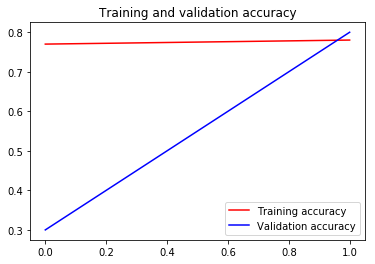

<Figure size 432x288 with 0 Axes>

In [49]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [0]:
#history = model.fit_generator(train_generator, epochs=4, validation_data = validation_generator , verbose = 1)


In [0]:
test_generator.reset()


In [51]:
#STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size

import numpy as np

predictions =model.predict_generator(test_generator, steps=100, verbose=1)
print(predictions)

predicted_class_indices=np.argmax(predictions,axis=1)
print(predicted_class_indices)

labels = (test_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictionsanswers = [labels[k] for k in predicted_class_indices]



100/100 [==============================] - 21s 212ms/step
[[5.70424914e-01 4.29575115e-01]
 [1.00000000e+00 5.85948818e-08]
 [5.21307111e-01 4.78692919e-01]
 ...
 [9.99999166e-01 7.79545303e-07]
 [9.99894261e-01 1.05752275e-04]
 [1.96935371e-01 8.03064644e-01]]
[0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0
 0 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0
 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0
 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0
 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1
 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1 1 1
 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 

In [52]:
filenames=test_generator.filenames

print(filenames)

['Biological/L7_046b9eaba768a01292b3639baa8e62e5.jpg', 'Biological/L7_054a5781a10df46bdc56046f25d95409.jpg', 'Biological/L7_0692f06d73b7279e20f72e3a1ddac191.jpg', 'Biological/L7_06f32d114c9fe666f7af0aa512bca76f.jpg', 'Biological/L7_070225a7efbf827891621ff305d3126b.jpg', 'Biological/L7_07832b09ff9d4fcfb56698ee5449fa3b.jpg', 'Biological/L7_07cd1d90c37b0f14f17d81d4fbc20f54.jpg', 'Biological/L7_07f896d05966491dff2b6bf79c78d6f3.jpg', 'Biological/L7_09286b39bbb5ba9a7f643f12fb8b41b8.jpg', 'Biological/L7_106605d67f32ffd4b0849c60ac2373f2.jpg', 'Biological/L7_1267e90189eef1995baafe92fd06ffb6.jpg', 'Biological/L7_13f29b8f7c19d22ce36bbd519bfba688.jpg', 'Biological/L7_164174a36294a0a66b7e6378d5d82b05.jpg', 'Biological/L7_184c6534c7036e22cd5fdfd366991c6a.jpg', 'Biological/L7_1bfcc9b868cf5fbe243b40663cc3d220.jpg', 'Biological/L7_1d3219563c9ece56c218bb783dcbf3b0.jpg', 'Biological/L7_1e2f3de5b13558809b44d5519182e05b.jpg', 'Biological/L7_1f3629f3edf4f58ed808ece1ead7783e.jpg', 'Biological/L7_1feaa98c55b8

In [53]:
len(filenames)

311

In [54]:
for i in range( 3):
 print(predictionsanswers[i] , filenames[i] ) 



Biological Biological/L7_046b9eaba768a01292b3639baa8e62e5.jpg
Biological Biological/L7_054a5781a10df46bdc56046f25d95409.jpg
Biological Biological/L7_0692f06d73b7279e20f72e3a1ddac191.jpg


In [55]:
# We preprocess the image into a 4D tensor
from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.

# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

(1, 150, 150, 3)


In [56]:
myinputlayer = 0
for alayer in model.layers:
  if alayer.name=='input_1':
    print(str(alayer.name) + '    \t \t \t ' +  str(alayer.trainable))
    myinputlayer = alayer

print(myinputlayer)

0


In [0]:
model.save('x.h5')


In [0]:
import keras



In [0]:
from keras.models import load_model


In [0]:
model = load_model('x.h5')

In [61]:
from keras import models

#from tensorflow.compat.v1.keras.models import Model

# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers]
# Creates a model that will return these outputs, given the model input:
#activation_model = models.Model(inputs=pre_trained_model.input, outputs=layer_outputs)

print( layer_outputs)

print( layer_outputs[0])
print( layer_outputs[15])




[<tf.Tensor 'input_2_1:0' shape=(?, 150, 150, 3) dtype=float32>, <tf.Tensor 'block1_conv1_1/Relu:0' shape=(?, 150, 150, 64) dtype=float32>, <tf.Tensor 'block1_conv2_1/Relu:0' shape=(?, 150, 150, 64) dtype=float32>, <tf.Tensor 'block1_pool_1/MaxPool:0' shape=(?, 75, 75, 64) dtype=float32>, <tf.Tensor 'block2_conv1_1/Relu:0' shape=(?, 75, 75, 128) dtype=float32>, <tf.Tensor 'block2_conv2_1/Relu:0' shape=(?, 75, 75, 128) dtype=float32>, <tf.Tensor 'block2_pool_1/MaxPool:0' shape=(?, 37, 37, 128) dtype=float32>, <tf.Tensor 'block3_conv1_1/Relu:0' shape=(?, 37, 37, 256) dtype=float32>, <tf.Tensor 'block3_conv2_1/Relu:0' shape=(?, 37, 37, 256) dtype=float32>, <tf.Tensor 'block3_conv3_1/Relu:0' shape=(?, 37, 37, 256) dtype=float32>, <tf.Tensor 'block3_pool_1/MaxPool:0' shape=(?, 18, 18, 256) dtype=float32>, <tf.Tensor 'block4_conv1_1/Relu:0' shape=(?, 18, 18, 512) dtype=float32>, <tf.Tensor 'block4_conv2_1/Relu:0' shape=(?, 18, 18, 512) dtype=float32>, <tf.Tensor 'block4_conv3_1/Relu:0' shape

In [0]:
activation_model = models.Model(inputs=layer_outputs[0], outputs=layer_outputs[15])

In [0]:
activations = activation_model.predict(img_tensor)


In [64]:
activations.shape

(1, 9, 9, 512)

In [65]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(9, 9, 512)


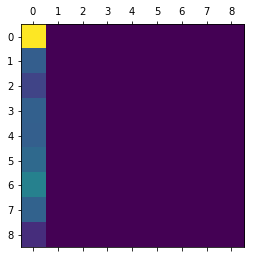

In [66]:
import matplotlib.pyplot as plt

plt.matshow(activations[0, :, :, 3], cmap='viridis')
plt.show()

In [0]:
activation_model = models.Model(inputs=layer_outputs[0], outputs=layer_outputs[3])

In [0]:
activations = activation_model.predict(img_tensor)


In [69]:
activations.shape

(1, 75, 75, 64)

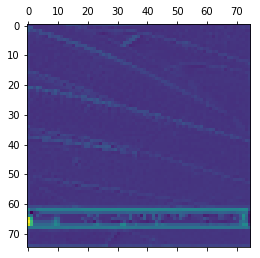

In [70]:
plt.matshow(activations[0, :, :, 3], aspect='auto', cmap='viridis')
plt.show()

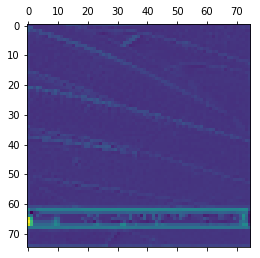

In [71]:
plt.matshow(activations[0, :, :, 3], aspect='auto', cmap='viridis')
plt.show()

In [0]:
activation_model = models.Model(inputs=layer_outputs[0], outputs=layer_outputs[9])

In [0]:
activations = activation_model.predict(img_tensor)


In [118]:
layer_activation = activations[0]

layer_activation.shape

(37, 37, 256)

In [114]:
activations.shape

(1, 37, 37, 256)

256
16
(592, 592)


<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

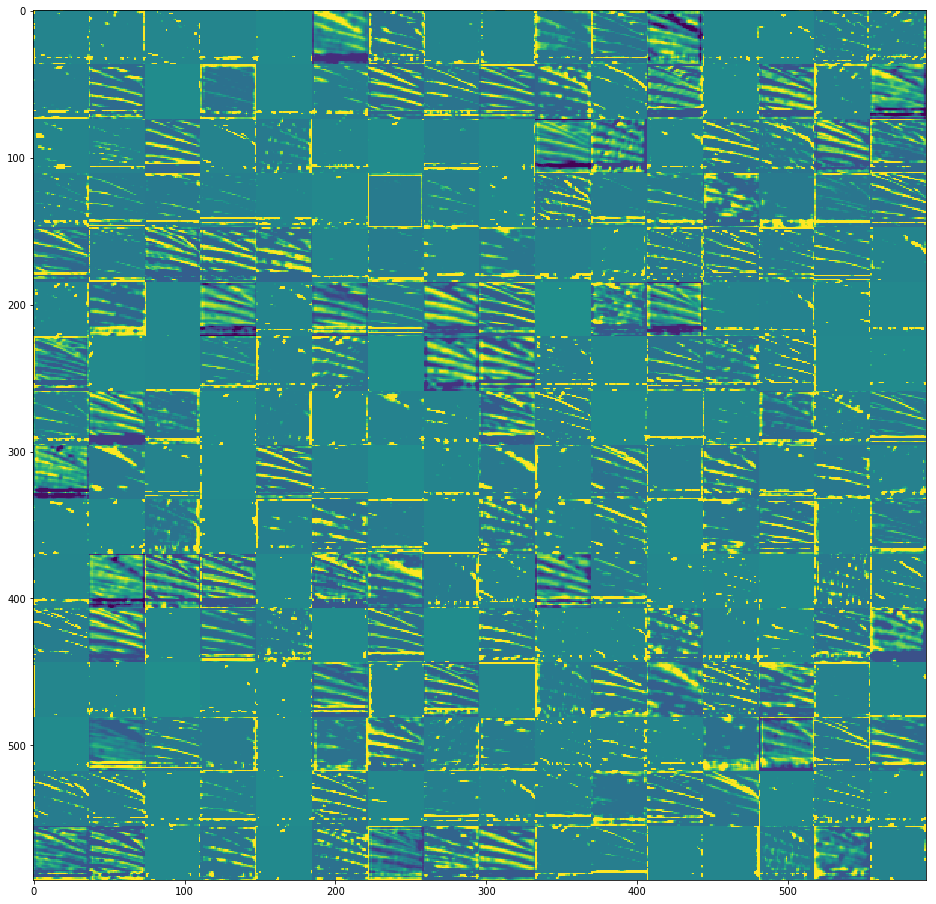

In [119]:
n_features = layer_activation.shape[-1]
size = layer_activation.shape[1]


print(n_features)

n_cols = n_features // images_per_row
display_grid = np.zeros((size * n_cols, images_per_row * size))

print(n_cols)
print(display_grid.shape)

# We'll tile each filter into this big horizontal grid
if True:
  for col in range(n_cols):
    for row in range(images_per_row):
              channel_image = layer_activation[
                                               :, :,
                                               col * images_per_row + row]
              # Post-process the feature to make it visually palatable
              channel_image -= channel_image.mean()
              channel_image /= channel_image.std()
              channel_image *= 64
              channel_image += 128
              channel_image = np.clip(channel_image, 0, 255).astype('uint8')
             # print(channel_image.shape)
             # print(col * size)
             # print((col + 1) * size)
              display_grid[col * size : (col + 1) * size,
                           row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                          scale * display_grid.shape[0]))
  plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

In [0]:
from keras.applications import VGG16
from keras import backend as K

#model = VGG16(weights='imagenet',              include_top=False)

layer_name = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

In [0]:
grads = K.gradients(loss, model.input)[0]


In [0]:
# We add 1e-5 before dividing so as to avoid accidentally dividing by 0.
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

In [0]:
iterate = K.function([model.input], [loss, grads])

# Let's test it:
import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

In [0]:
# We start from a gray image with some noise
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.

# Run gradient ascent for 40 steps
step = 1.  # this is the magnitude of each gradient update
for i in range(40):
    # Compute the loss value and gradient value
    loss_value, grads_value = iterate([input_img_data])
    # Here we adjust the input image in the direction that maximizes the loss
    input_img_data += grads_value * step

In [0]:
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [0]:
def generate_pattern(layer_name, filter_index, size=150):
    # Build a loss function that maximizes the activation
    # of the nth filter of the layer considered.
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])

    # Compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, model.input)[0]

    # Normalization trick: we normalize the gradient
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

    # This function returns the loss and grads given the input picture
    iterate = K.function([model.input], [loss, grads])
    
    # We start from a gray image with some noise
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.

    # Run gradient ascent for 40 steps
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return deprocess_image(img)

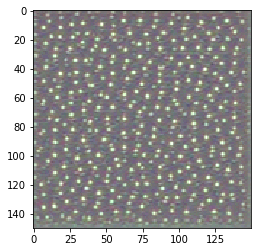

In [86]:
plt.imshow(generate_pattern('block3_conv1', 0))
plt.show()

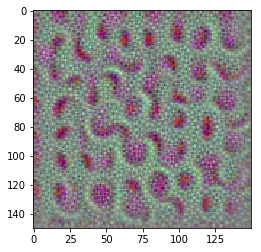

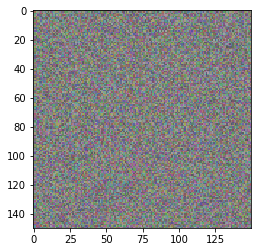

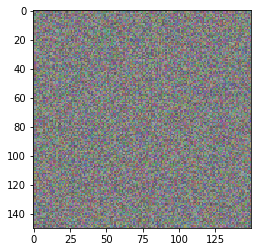

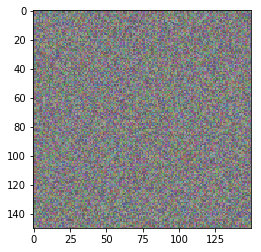

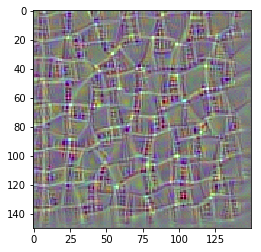

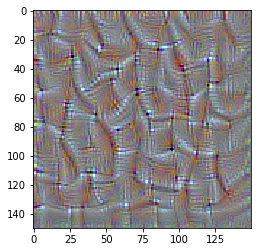

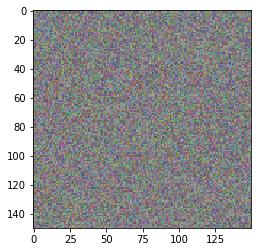

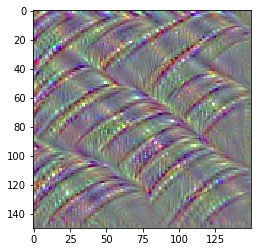

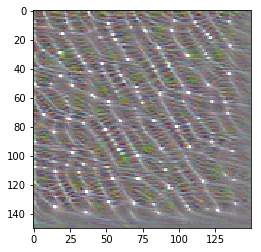

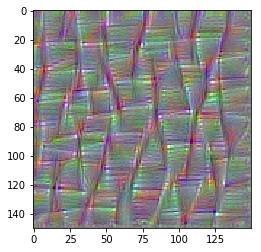

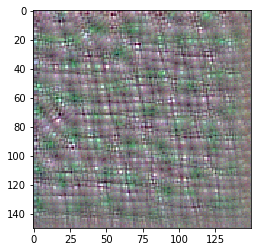

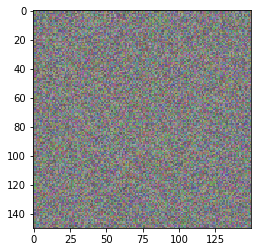

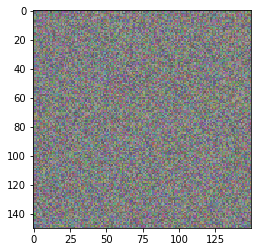

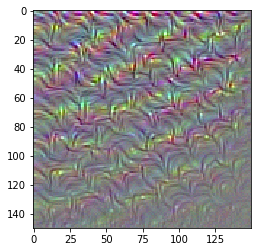

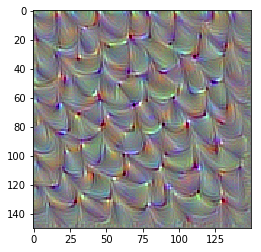

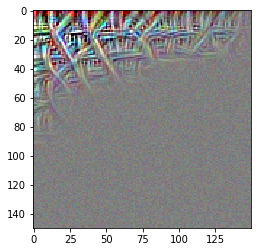

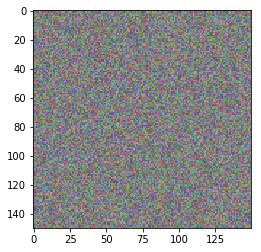

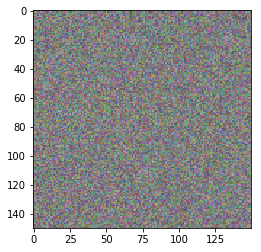

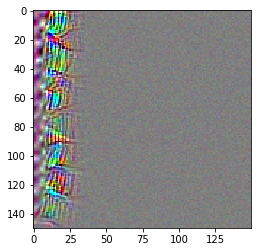

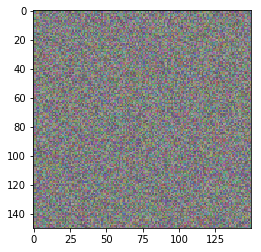

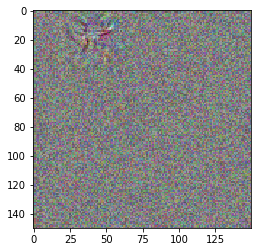

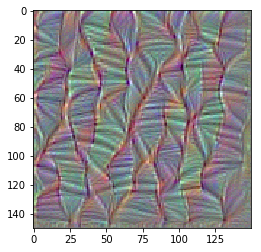

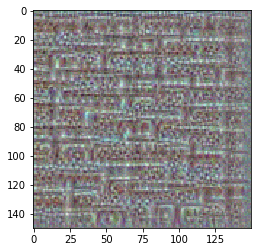

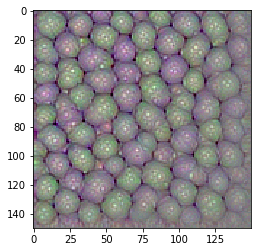

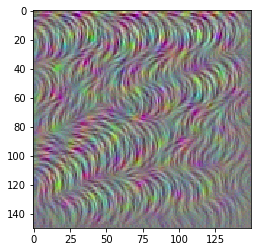

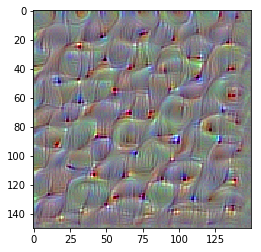

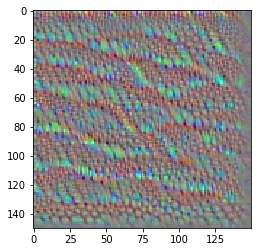

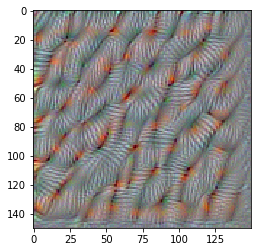

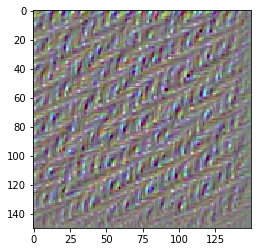

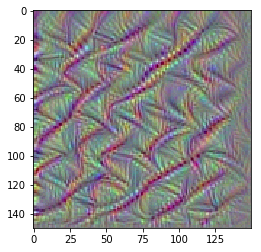

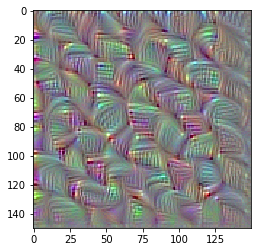

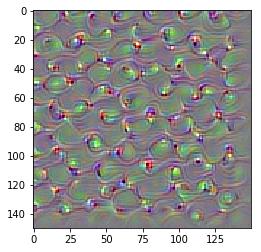

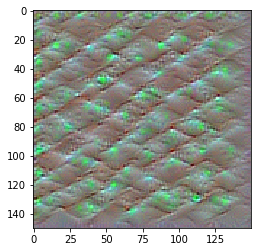

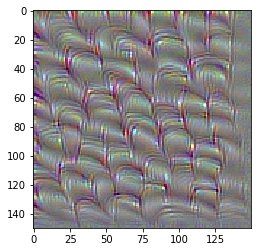

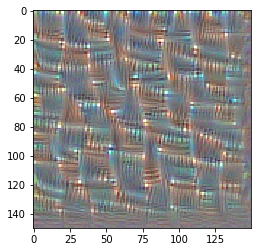

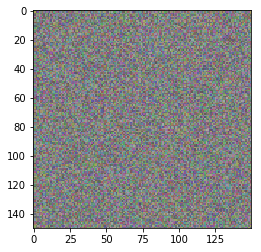

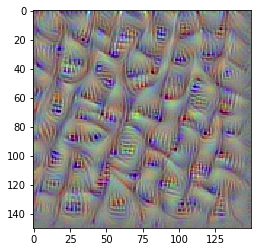

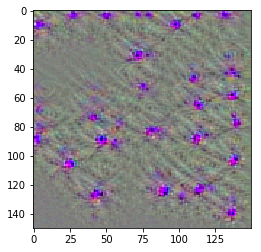

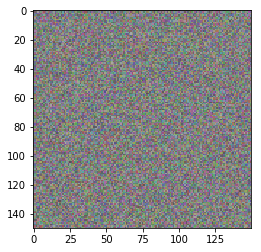

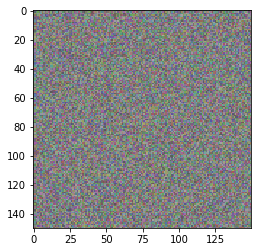

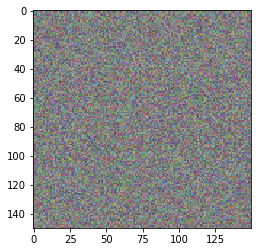

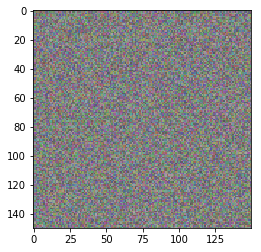

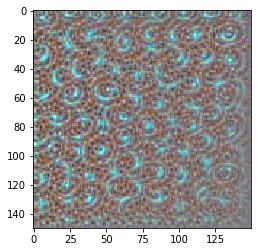

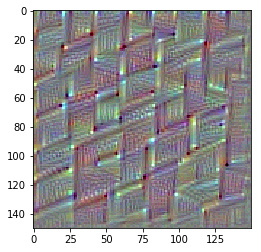

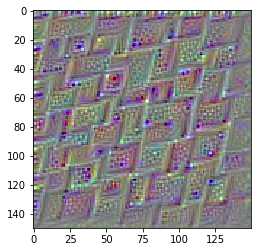

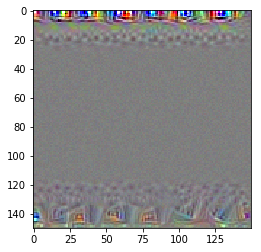

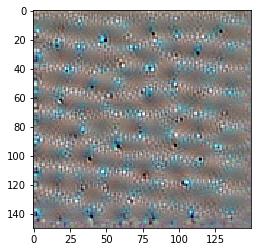

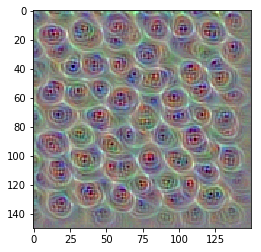

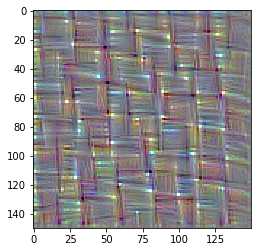

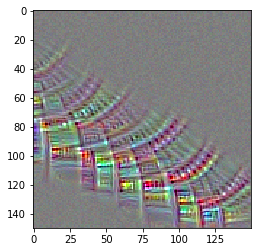

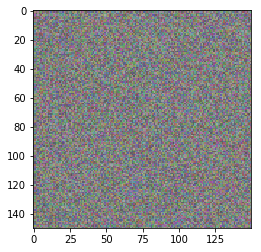

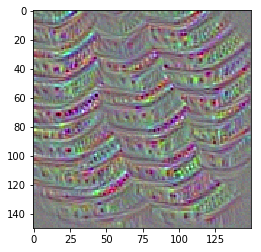

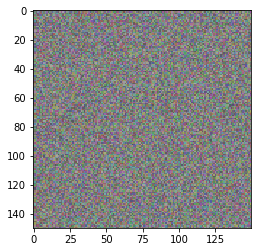

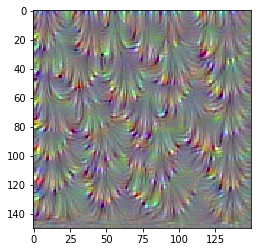

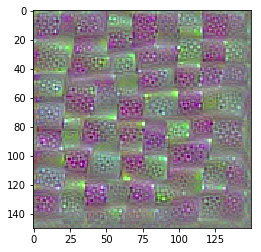

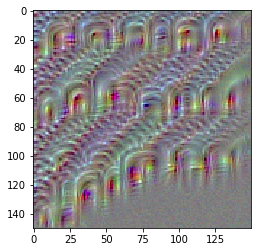

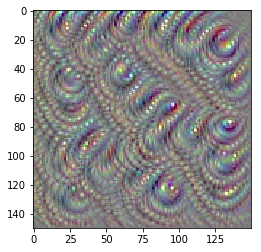

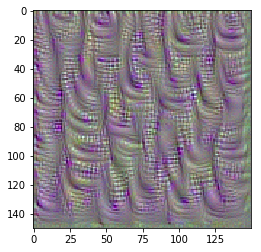

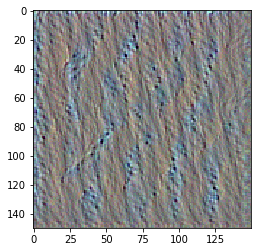

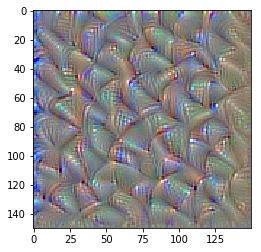

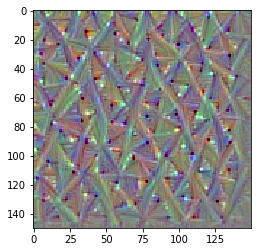

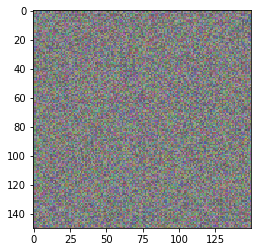

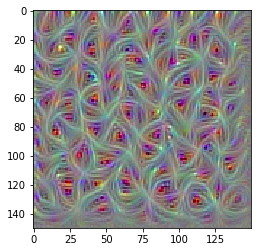

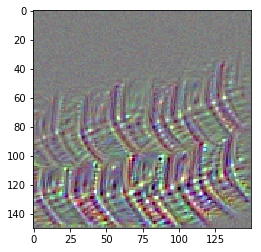

In [87]:
for i in range(64):
  plt.imshow(generate_pattern('block4_conv1', i))
  plt.show()

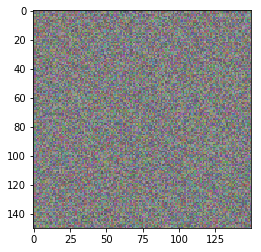

In [88]:
plt.imshow(generate_pattern('block5_conv3', 4))
plt.show()

In [90]:
model.save('GOODVisuvalizationx.h5')


KeyboardInterrupt: ignored

In [0]:
from google.colab import files
files.download('GOODVisuvalizationx.h5') 